# Chapter 3 - Deep Q-learning
### Deep Reinforcement Learning *in Action*

##### Listing 3.1

In [1]:
from Gridworld import Gridworld
game = Gridworld(size=4, mode='static')

In [2]:
game.display()

array([['+', '-', ' ', 'P'],
       [' ', 'W', ' ', ' '],
       [' ', ' ', ' ', ' '],
       [' ', ' ', ' ', ' ']], dtype='<U2')

In [3]:
game.makeMove('d')
game.makeMove('d')
game.makeMove('l')
game.display()

array([['+', '-', ' ', ' '],
       [' ', 'W', ' ', ' '],
       [' ', ' ', 'P', ' '],
       [' ', ' ', ' ', ' ']], dtype='<U2')

In [4]:
game.reward()

-1

In [5]:
game.board.render_np()

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 0]],

       [[1, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 1, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

##### Listing 3.2

In [6]:
import numpy as np
import torch
from Gridworld import Gridworld
from IPython.display import clear_output
import random
from matplotlib import pylab as plt

l1 = 64
l2 = 150
l3 = 100
l4 = 4

model = torch.nn.Sequential(
    torch.nn.Linear(l1, l2),
    torch.nn.ReLU(),
    torch.nn.Linear(l2, l3),
    torch.nn.ReLU(),
    torch.nn.Linear(l3,l4)
)
loss_fn = torch.nn.MSELoss()
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

gamma = 0.9
epsilon = 1.0
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

gamma = 0.9
epsilon = 1.0

##### Listing 3.3

In [7]:
action_set = {
    0: 'u',
    1: 'd',
    2: 'l',
    3: 'r',
}

In [14]:
epochs = 10
losses = [] #A
for i in range(epochs): #B
    game = Gridworld(size=4, mode='static') #C
    state_ = game.board.render_np().reshape(1,64) + np.random.rand(1,64)/10.0 #D
    state = torch.from_numpy(state_).float() #E
    status = 1 #F
    while(status == 1): #G
        qval = model(state) #H
        qval_ = qval.data.numpy()
        if (random.random() < epsilon): #I
            action_ = np.random.randint(0,4)
        else:
            action_ = np.argmax(qval_)
        
        action = action_set[action_] #J
        game.makeMove(action) #K
        state2_ = game.board.render_np().reshape(1,64) + np.random.rand(1,64)/10.0
        state2 = torch.from_numpy(state2_).float() #L
        reward = game.reward()
        with torch.no_grad():
            newQ = model(state2.reshape(1,64))
        maxQ = torch.max(newQ) #M
        if reward == -1: #N
            Y = reward + (gamma * maxQ)
        else:
            Y = reward
        print('Y: ',Y)
        Y = torch.Tensor([Y]).detach()
        X = qval.squeeze()[action_] #O
        loss = loss_fn(X, Y) #P
        print(i, loss.item())
        #clear_output(wait=True)
        optimizer.zero_grad()
        loss.backward()
        losses.append(loss.item())
        optimizer.step()
        state1 = state2
        if reward != -1: #Q
            status = 0
    if epsilon > 0.1: #R
        epsilon -= (1/epochs)

Y:  tensor(-8.6165)
0 0.05355766415596008
Y:  tensor(-8.7724)
0 0.11679120361804962
Y:  tensor(-8.4893)
0 8.359217463294044e-05
Y:  tensor(-8.6226)
0 0.009495437145233154
Y:  tensor(-8.5771)
0 7.906871906016022e-05
Y:  tensor(-8.8856)
0 0.07742451131343842
Y:  tensor(-8.4389)
0 0.04439932852983475
Y:  tensor(-9.0038)
0 0.10323646664619446
Y:  tensor(-9.1234)
0 0.16249653697013855
Y:  tensor(-9.4506)
0 0.47044143080711365
Y:  tensor(-9.0987)
0 0.08883091807365417
Y:  -10
0 1.3244651556015015
Y:  tensor(-8.9805)
1 0.1499854177236557
Y:  tensor(-9.0897)
1 0.18512669205665588
Y:  tensor(-9.3606)
1 0.39762264490127563
Y:  tensor(-8.9667)
1 0.02463599666953087
Y:  tensor(-9.5491)
1 0.4468386173248291
Y:  tensor(-9.4981)
1 0.2910800576210022
Y:  tensor(-9.6131)
1 0.3213629126548767
Y:  tensor(-9.5314)
1 0.16367504000663757
Y:  -10
1 0.6243998408317566
Y:  tensor(-10.1966)
2 0.3563283085823059
Y:  tensor(-10.5942)
2 0.7725130915641785
Y:  tensor(-10.0965)
2 0.07259363681077957
Y:  tensor(-10.0

Y:  tensor(-9.4673)
4 6.128873792476952e-05
Y:  tensor(-9.6768)
4 0.01567988470196724
Y:  tensor(-9.3472)
4 0.017935767769813538
Y:  tensor(-9.2015)
4 0.08174815028905869
Y:  tensor(-9.2551)
4 0.05255116894841194
Y:  tensor(-9.5223)
4 0.0022631080355495214
Y:  tensor(-9.4497)
4 0.0003185856621712446
Y:  tensor(-8.5573)
4 1.2379367351531982
Y:  tensor(-9.5056)
4 0.005247022490948439
Y:  tensor(-9.2143)
4 0.03860805928707123
Y:  tensor(-9.1681)
4 0.04697855934500694
Y:  tensor(-9.4781)
4 0.01514546200633049
Y:  tensor(-9.4381)
4 0.011268967762589455
Y:  tensor(-9.0016)
4 0.09778205305337906
Y:  tensor(-9.1044)
4 0.03418741002678871
Y:  tensor(-9.1035)
4 0.024928148835897446
Y:  tensor(-8.9602)
4 0.07369444519281387
Y:  tensor(-9.4032)
4 0.04245303198695183
Y:  tensor(-9.2862)
4 0.013025878928601742
Y:  tensor(-9.3072)
4 0.023819005116820335
Y:  tensor(-9.2815)
4 0.020032640546560287
Y:  tensor(-9.1854)
4 0.016127509996294975
Y:  tensor(-9.0924)
4 0.0009640856296755373
Y:  tensor(-8.8236)

Y:  tensor(-9.8145)
4 0.3771287500858307
Y:  tensor(-10.1240)
4 0.09124089777469635
Y:  tensor(-10.1189)
4 0.0823250412940979
Y:  tensor(-10.4894)
4 0.014101019129157066
Y:  tensor(-10.3027)
4 0.0018690027063712478
Y:  tensor(-10.0439)
4 0.0768476277589798
Y:  tensor(-9.6673)
4 0.37846991419792175
Y:  tensor(-10.0870)
4 0.015723861753940582
Y:  tensor(-9.9905)
4 0.023015210404992104
Y:  tensor(-9.8025)
4 0.07183966040611267
Y:  tensor(-9.9173)
4 0.005428028758615255
Y:  tensor(-9.6769)
4 0.056972187012434006
Y:  tensor(-9.5785)
4 0.06554944813251495
Y:  tensor(-9.7523)
4 0.3847440481185913
Y:  tensor(-9.4635)
4 0.03770717233419418
Y:  tensor(-9.5556)
4 0.00011736992746591568
Y:  tensor(-9.1063)
4 0.14276021718978882
Y:  tensor(-9.3959)
4 2.805510666803457e-05
Y:  tensor(-9.0945)
4 0.045222990214824677
Y:  tensor(-8.9199)
4 0.09087541699409485
Y:  tensor(-8.9826)
4 0.021530097350478172
Y:  tensor(-9.1541)
4 0.013138885609805584
Y:  tensor(-8.9195)
4 0.0020485064014792442
Y:  tensor(-8.8

4 0.0009918808937072754
Y:  tensor(-5.5167)
4 0.01225800346583128
Y:  tensor(-5.3770)
4 0.000663340906612575
Y:  tensor(-5.1361)
4 0.06931354850530624
Y:  tensor(-5.4405)
4 0.002383161336183548
Y:  tensor(-5.2930)
4 0.008562994189560413
Y:  tensor(-6.0155)
4 0.09070386737585068
Y:  tensor(-5.6999)
4 0.10908350348472595
Y:  tensor(-5.8864)
4 0.26916804909706116
Y:  tensor(-5.9291)
4 0.30722928047180176
Y:  tensor(-5.7574)
4 0.13419952988624573
Y:  tensor(-5.8429)
4 0.18555204570293427
Y:  tensor(-5.9762)
4 0.28887128829956055
Y:  tensor(-6.0149)
4 0.0011799824424088001
Y:  tensor(-6.0092)
4 0.25692713260650635
Y:  tensor(-5.5124)
4 0.3428451418876648
Y:  tensor(-5.2764)
4 0.0842200517654419
Y:  tensor(-5.5282)
4 0.0034065134823322296
Y:  tensor(-5.7145)
4 0.0123157212510705
Y:  tensor(-5.8967)
4 0.033086925745010376
Y:  tensor(-5.5436)
4 0.008339610882103443
Y:  tensor(-5.4914)
4 0.023867599666118622
Y:  tensor(-5.5189)
4 0.017965028062462807
Y:  tensor(-5.5676)
4 0.007964386604726315
Y

Text(0, 0.5, 'Loss')

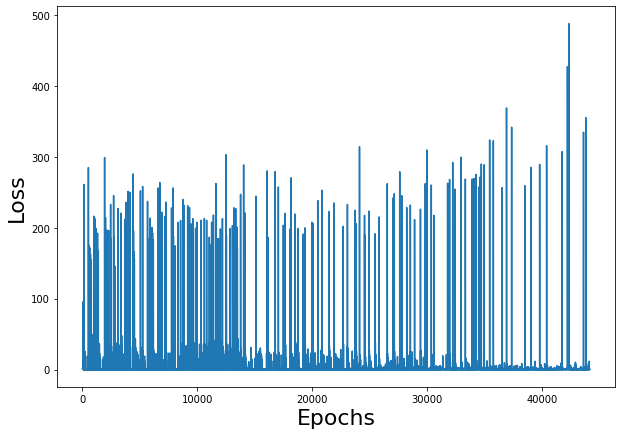

In [12]:
plt.figure(figsize=(10,7))
plt.plot(losses)
plt.xlabel("Epochs",fontsize=22)
plt.ylabel("Loss",fontsize=22)

##### PyTorch Automatic Differentiation Review

In [ ]:
m = torch.Tensor([2.0])
m.requires_grad=True
b = torch.Tensor([1.0])
b.requires_grad=True
def linear_model(x,m,b):
    y = m + b#@ x + b
    return y

In [ ]:
#with torch.no_grad():
y = linear_model(torch.Tensor([4]),m,b)

In [ ]:
y.grad_fn

In [ ]:
y.backward()

In [ ]:
m.grad

##### Listing 3.4

In [9]:
def test_model(model, mode='static', display=True):
    i = 0
    test_game = Gridworld(mode=mode)
    state_ = test_game.board.render_np().reshape(1,64) + np.random.rand(1,64)/10.0
    state = torch.from_numpy(state_).float()
    if display:
        print("Initial State:")
        print(test_game.display())
    status = 1
    while(status == 1): #A
        qval = model(state)
        qval_ = qval.data.numpy()
        action_ = np.argmax(qval_) #B
        action = action_set[action_]
        if display:
            print('Move #: %s; Taking action: %s' % (i, action))
        test_game.makeMove(action)
        state_ = test_game.board.render_np().reshape(1,64) + np.random.rand(1,64)/10.0
        state = torch.from_numpy(state_).float()
        if display:
            print(test_game.display())
        reward = test_game.reward()
        if reward != -1:
            if reward > 0:
                status = 2
                if display:
                    print("Game won! Reward: %s" % (reward,))
            else:
                status = 0
                if display:
                    print("Game LOST. Reward: %s" % (reward,))
        i += 1
        if (i > 15):
            if display:
                print("Game lost; too many moves.")
            break
    
    win = True if status == 2 else False
    return win

In [10]:
test_model(model)

Initial State:
[['+' '-' ' ' 'P']
 [' ' 'W' ' ' ' ']
 [' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ']]
Move #: 0; Taking action: u
[['+' '-' ' ' 'P']
 [' ' 'W' ' ' ' ']
 [' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ']]
Move #: 1; Taking action: u
[['+' '-' ' ' 'P']
 [' ' 'W' ' ' ' ']
 [' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ']]
Move #: 2; Taking action: u
[['+' '-' ' ' 'P']
 [' ' 'W' ' ' ' ']
 [' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ']]
Move #: 3; Taking action: u
[['+' '-' ' ' 'P']
 [' ' 'W' ' ' ' ']
 [' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ']]
Move #: 4; Taking action: u
[['+' '-' ' ' 'P']
 [' ' 'W' ' ' ' ']
 [' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ']]
Move #: 5; Taking action: u
[['+' '-' ' ' 'P']
 [' ' 'W' ' ' ' ']
 [' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ']]
Move #: 6; Taking action: u
[['+' '-' ' ' 'P']
 [' ' 'W' ' ' ' ']
 [' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ']]
Move #: 7; Taking action: u
[['+' '-' ' ' 'P']
 [' ' 'W' ' ' ' ']
 [' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ']]
Move #: 8; Taking action: u
[['+' '-' ' ' 'P']
 [' ' 'W' ' ' ' ']
 [

False

##### Listing 3.5

In [33]:
l1 = 64
l2 = 150
l3 = 100
l4 = 4

model = torch.nn.Sequential(
    torch.nn.Linear(l1, l2),
    torch.nn.ReLU(),
    torch.nn.Linear(l2, l3),
    torch.nn.ReLU(),
    torch.nn.Linear(l3,l4)
)
loss_fn = torch.nn.MSELoss()
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

gamma = 0.9
epsilon = 0.3

In [34]:
from collections import deque
epochs = 5000
losses = []
mem_size = 1000 #A
batch_size = 200 #B
replay = deque(maxlen=mem_size) #C
max_moves = 50 #D
h = 0
for i in range(epochs):
    game = Gridworld(size=4, mode='random')
    state1_ = game.board.render_np().reshape(1,64) + np.random.rand(1,64)/100.0
    state1 = torch.from_numpy(state1_).float()
    status = 1
    mov = 0
    while(status == 1): 
        mov += 1
        qval = model(state1) #E
        qval_ = qval.data.numpy()
        if (random.random() < epsilon): #F
            action_ = np.random.randint(0,4)
        else:
            action_ = np.argmax(qval_)
        
        action = action_set[action_]
        game.makeMove(action)
        state2_ = game.board.render_np().reshape(1,64) + np.random.rand(1,64)/100.0
        state2 = torch.from_numpy(state2_).float()
        reward = game.reward()
        done = True if reward > 0 else False
        exp =  (state1, action_, reward, state2, done) #G
        replay.append(exp) #H
        state1 = state2
        
        if len(replay) > batch_size: #I
            minibatch = random.sample(replay, batch_size) #J
            state1_batch = torch.cat([s1 for (s1,a,r,s2,d) in minibatch]) #K
            action_batch = torch.Tensor([a for (s1,a,r,s2,d) in minibatch])
            reward_batch = torch.Tensor([r for (s1,a,r,s2,d) in minibatch])
            state2_batch = torch.cat([s2 for (s1,a,r,s2,d) in minibatch])
            done_batch = torch.Tensor([d for (s1,a,r,s2,d) in minibatch])
            
            Q1 = model(state1_batch) #L
            with torch.no_grad():
                Q2 = model(state2_batch) #M
            
            Y = reward_batch + gamma * ((1 - done_batch) * torch.max(Q2,dim=1)[0]) #N
            X = Q1.gather(dim=1,index=action_batch.long().unsqueeze(dim=1)).squeeze()
            loss = loss_fn(X, Y.detach())
            print(i, loss.item())
            clear_output(wait=True)
            optimizer.zero_grad()
            loss.backward()
            losses.append(loss.item())
            optimizer.step()

        if reward != -1 or mov > max_moves: #O
            status = 0
            mov = 0
losses = np.array(losses)

#A Set the total size of the experience replay memory
#B Set the minibatch size
#C Create the memory replay as a deque list
#D Maximum number of moves before game is over
#E Compute Q-values from input state in order to select action
#F Select action using epsilon-greedy strategy
#G Create experience of state, reward, action and next state as a tuple
#H Add experience to experience replay list
#I If replay list is at least as long as minibatch size, begin minibatch training
#J Randomly sample a subset of the replay list
#K Separate out the components of each experience into separate minibatch tensors
#L Re-compute Q-values for minibatch of states to get gradients
#M Compute Q-values for minibatch of next states but don't compute gradients
#N Compute the target Q-values we want the DQN to learn
#O If game is over, reset status and mov number

4999 0.06030523404479027


In [35]:
def running_mean(x,N=50):
    c = x.shape[0] - N
    y = np.zeros(c)
    conv = np.ones(N)
    for i in range(c):
        y[i] = (x[i:i+N] @ conv)/N
    return y

Text(0, 0.5, 'Loss')

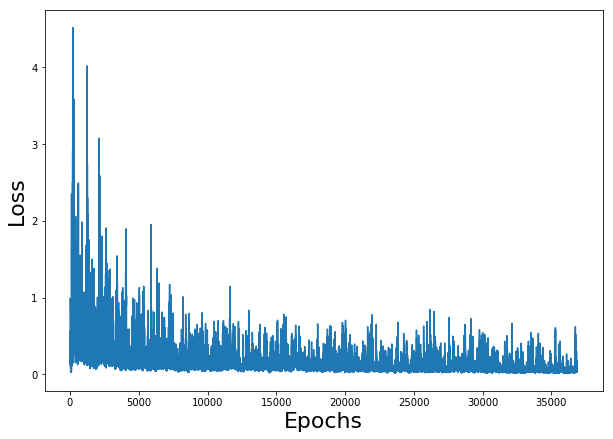

In [36]:
plt.figure(figsize=(10,7))
plt.plot(losses)
plt.xlabel("Epochs",fontsize=22)
plt.ylabel("Loss",fontsize=22)

In [37]:
max_games = 1000
wins = 0
for i in range(max_games):
    win = test_model(model, mode='random', display=False)
    if win:
        wins += 1
win_perc = float(wins) / float(max_games)
print("Games played: {0}, # of wins: {1}".format(max_games,wins))
print("Win percentage: {}%".format(100.0*win_perc))

Games played: 1000, # of wins: 927
Win percentage: 92.7%


In [14]:
test_model(model, mode='random')

Initial State:
[['P' ' ' ' ' '-']
 [' ' 'W' ' ' ' ']
 [' ' ' ' '+' ' ']
 [' ' ' ' ' ' ' ']]
Move #: 0; Taking action: r
[[' ' 'P' ' ' '-']
 [' ' 'W' ' ' ' ']
 [' ' ' ' '+' ' ']
 [' ' ' ' ' ' ' ']]
Move #: 1; Taking action: r
[[' ' ' ' 'P' '-']
 [' ' 'W' ' ' ' ']
 [' ' ' ' '+' ' ']
 [' ' ' ' ' ' ' ']]
Move #: 2; Taking action: d
[[' ' ' ' ' ' '-']
 [' ' 'W' 'P' ' ']
 [' ' ' ' '+' ' ']
 [' ' ' ' ' ' ' ']]
Move #: 3; Taking action: d
[[' ' ' ' ' ' '-']
 [' ' 'W' ' ' ' ']
 [' ' ' ' '+' ' ']
 [' ' ' ' ' ' ' ']]
Game won! Reward: 10


True

###### Listing 3.7

In [83]:
import copy

l1 = 64
l2 = 150
l3 = 100
l4 = 4


model = torch.nn.Sequential(
    torch.nn.Linear(l1, l2),
    torch.nn.ReLU(),
    torch.nn.Linear(l2, l3),
    torch.nn.ReLU(),
    torch.nn.Linear(l3,l4)
)

model2 = copy.deepcopy(model) #A
model2.load_state_dict(model.state_dict()) #B

loss_fn = torch.nn.MSELoss()
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

gamma = 0.9
epsilon = 0.3

In [93]:
from collections import deque 
epochs = 5000
losses = []
mem_size = 1000
batch_size = 200
replay = deque(maxlen=mem_size)
max_moves = 50
h = 0
sync_freq = 500 #A
j=0
for i in range(epochs):
    game = Gridworld(size=4, mode='random')
    state1_ = game.board.render_np().reshape(1,64) + np.random.rand(1,64)/100.0
    state1 = torch.from_numpy(state1_).float()
    status = 1
    mov = 0
    while(status == 1): 
        j+=1
        mov += 1
        qval = model(state1)
        qval_ = qval.data.numpy()
        if (random.random() < epsilon):
            action_ = np.random.randint(0,4)
        else:
            action_ = np.argmax(qval_)
        
        action = action_set[action_]
        game.makeMove(action)
        state2_ = game.board.render_np().reshape(1,64) + np.random.rand(1,64)/100.0
        state2 = torch.from_numpy(state2_).float()
        reward = game.reward()
        done = True if reward > 0 else False
        exp =  (state1, action_, reward, state2, done)
        replay.append(exp) #H
        state1 = state2
        
        if len(replay) > batch_size:
            minibatch = random.sample(replay, batch_size)
            state1_batch = torch.cat([s1 for (s1,a,r,s2,d) in minibatch])
            action_batch = torch.Tensor([a for (s1,a,r,s2,d) in minibatch])
            reward_batch = torch.Tensor([r for (s1,a,r,s2,d) in minibatch])
            state2_batch = torch.cat([s2 for (s1,a,r,s2,d) in minibatch])
            done_batch = torch.Tensor([d for (s1,a,r,s2,d) in minibatch])
            Q1 = model(state1_batch) 
            with torch.no_grad():
                Q2 = model2(state2_batch) #B
            
            Y = reward_batch + gamma * ((1-done_batch) * torch.max(Q2,dim=1)[0])
            X = Q1.gather(dim=1,index=action_batch.long().unsqueeze(dim=1)).squeeze()
            loss = loss_fn(X, Y.detach())
            print(i, loss.item())
            clear_output(wait=True)
            optimizer.zero_grad()
            loss.backward()
            losses.append(loss.item())
            optimizer.step()
            
            if j % sync_freq == 0: #C
                model2.load_state_dict(model.state_dict())
        if reward != -1 or mov > max_moves:
            status = 0
            mov = 0
        
losses = np.array(losses)

#A Set the update frequency for synchronizing the target model parameters to the main DQN
#B Use the target network to get the maiximum Q-value for the next state
#C Copy the main model parameters to the target network

2999 0.02813359536230564


Text(0, 0.5, 'Loss')

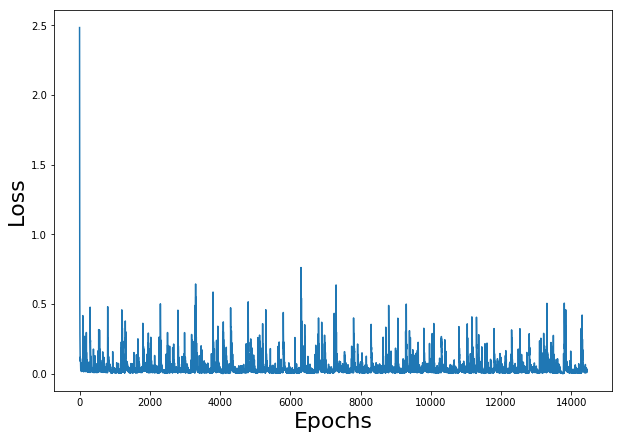

In [94]:
plt.figure(figsize=(10,7))
plt.plot(losses)
plt.xlabel("Epochs",fontsize=22)
plt.ylabel("Loss",fontsize=22)

In [108]:
max_games = 1000
wins = 0
for i in range(max_games):
    win = test_model(model, mode='random', display=False)
    if win:
        wins += 1
win_perc = float(wins) / float(max_games)
print("Games played: {0}, # of wins: {1}".format(max_games,wins))
print("Win percentage: {}%".format(100.0*win_perc))

Games played: 1000, # of wins: 942
Win percentage: 94.19999999999999%
